# Sheet 4

In [3]:
import numpy as np
from matplotlib import pyplot as plt
import torch
import torch.nn as nn
from tqdm import tqdm
import math

# 2) Amplitude Regression

In [4]:
# load data
trn_dat = np.load("tutorial-2-data/trn_dat.npy")
trn_amp = np.load("tutorial-2-data/trn_amp.npy")

val_dat = np.load("tutorial-2-data/val_dat.npy")
val_amp = np.load("tutorial-2-data/val_amp.npy")

tst_dat = np.load("tutorial-2-data/tst_dat.npy")
tst_amp = np.load("tutorial-2-data/tst_amp.npy")

print(f"train data shape: {trn_dat.shape}")
print(f"train amp  shape: {trn_amp.shape}")
print(f"test  data shape: {tst_dat.shape}")
print(f"test  amp  shape: {tst_amp.shape}")
print(f"val   data shape: {val_dat.shape}")
print(f"val   amp  shape: {val_amp.shape}")

train data shape: (30000, 5, 4)
train amp  shape: (30000,)
test  data shape: (30000, 5, 4)
test  amp  shape: (30000,)
val   data shape: (30000, 5, 4)
val   amp  shape: (30000,)


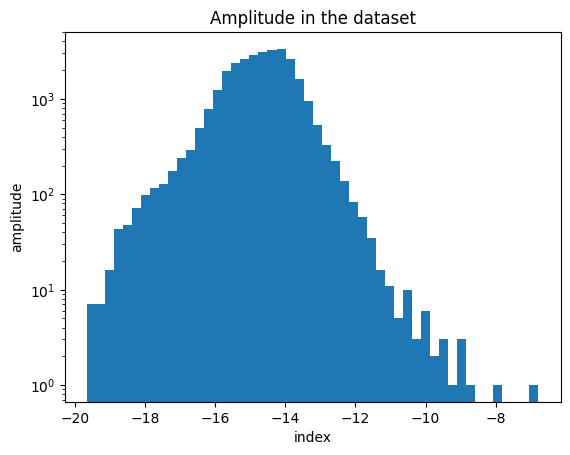

In [5]:
# Plot amplitudes
plt.hist(np.log(trn_amp), bins=50)
plt.title("Amplitude in the dataset")
plt.xlabel("index")
plt.ylabel("amplitude")
plt.yscale("log")

In [92]:
def feature_extractor(number_of_the_particle):
    particle_momenta = []
    for i in range(0, 4):
        particle_momenta.append(trn_dat[:,number_of_the_particle,i])
    particle_momenta = np.array([np.array(axis_momenta) for axis_momenta in particle_momenta])
    return particle_momenta

In [108]:
def gluon_momentum_visualizer(gluon1_momenta, gluon2_momenta, color, axis):
    momenta_sum = gluon1_momenta[:] + gluon2_momenta[:]
    plt.hist(momenta_sum, bins=50, color=color, alpha=0.6)
    plt.title("Sum of the momentum on axis " + str(axis) + " for the particles")
    plt.xlabel("index")
    plt.ylabel("momentum")

1
2
3


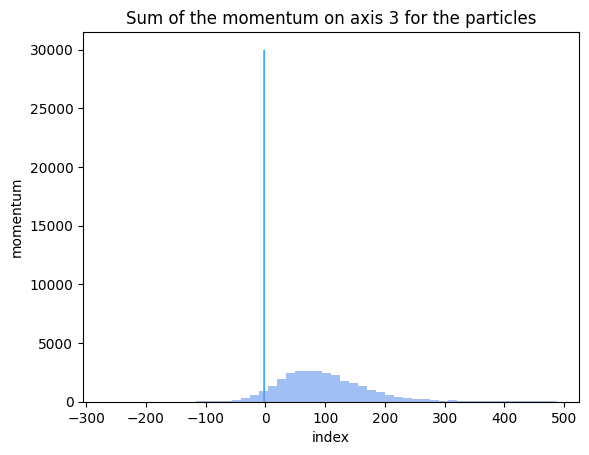

In [109]:
# Plot incoming momenta
gluon1_momenta = feature_extractor(0)
gluon2_momenta = feature_extractor(1)

colors = ["deepskyblue", "dodgerblue", "cornflowerblue"]

for i in range(1, 4):
    print(i)
    gluon_momentum_visualizer(gluon1_momenta[i], gluon2_momenta[i], colors[i - 1], i)
plt.show()

In [122]:
def photon_momentum_visualizer(photon, color, label):
    transverse_momenta = np.sqrt(photon[1, :]**2 + photon[2, :]**2)

    plt.hist(transverse_momenta, bins=50, color=color, alpha=0.6, label=label)
    plt.title("Transverse momentum for leading and subleading photons")
    plt.xlabel("index")
    plt.ylabel("momentum")
    plt.yscale("log")
    plt.legend()
    return transverse_momenta

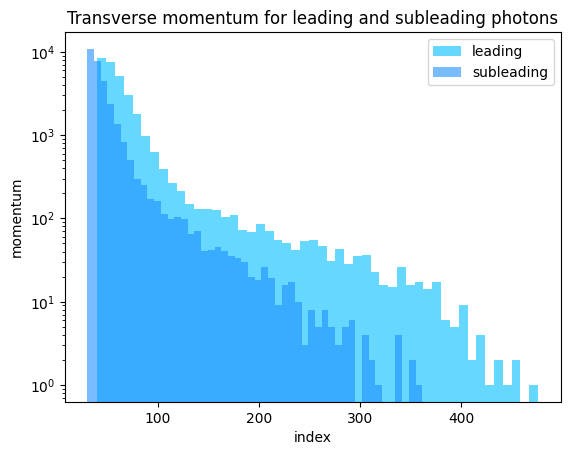

In [123]:
# Plot photon pTs
leading_photon_momenta = feature_extractor(2)
subleading_photon_momenta = feature_extractor(3)

transverse_leading_momenta = photon_momentum_visualizer(leading_photon_momenta, colors[0], "leading")
transverse_subleading_momenta = photon_momentum_visualizer(subleading_photon_momenta, colors[1], "subleading")
plt.show()

In [124]:
def missing_energy_calculator():
    leading_MET = np.sum(transverse_leading_momenta)
    subleading_MET = np.sum(transverse_subleading_momenta)
    return np.array([leading_MET, subleading_MET])

[2038165.54480347 1402743.71813659]


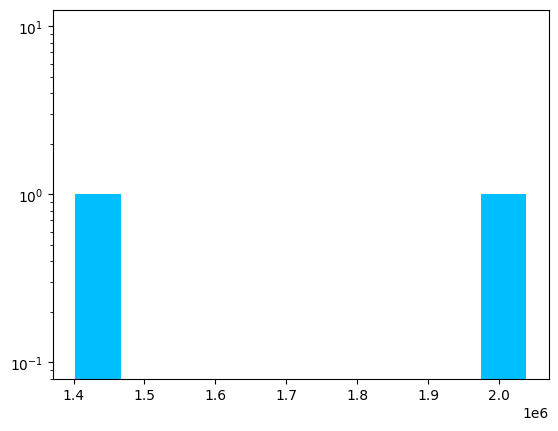

In [128]:
# TODO: Plot MET
MET = missing_energy_calculator()
print(MET)

plt.hist(MET, color=colors[0])
plt.yscale("log")
plt.show()

In [12]:
# flatten datasets
nev = trn_dat.shape[0]
trn_datf = np.reshape(trn_dat, (nev, -1))
val_datf = np.reshape(val_dat, (nev, -1))
tst_datf = np.reshape(tst_dat, (nev, -1))

In [13]:
# TODO: Implement preprocessing
def preprocess_x(x_in):
    pass

def preprocess_A(A_in):
    pass

def undo_preprocess_A(A_in):
    pass

In [14]:
# check that network inputs are O(1)
for i in range(20):
    plt.hist(preprocess_x(trn_datf)[0][:,i], range=(-5,5), alpha=.5, bins=50)
plt.hist(preprocess_A(trn_amp)[0][:,0], range=(-5,5), alpha=.5, bins=50)
plt.show()

TypeError: 'NoneType' object is not subscriptable

In [ ]:
# TODO: Implement dataset class
class amp_dataset(torch.utils.data.Dataset):
    
    def __init__(self, data, amp):
        pass

    def __len__(self):
        pass

    def __getitem__(self, idx):
        pass

In [ ]:
# TODO: create datasets and dataloaders

trn_dataloader = ...
val_dataloader = ...
tst_dataloader = ...

In [ ]:
device = "cuda" if torch.cuda.is_available() else "cpu"
print(f"Using {device} device")

In [ ]:
# TODO: Implement network
class amp_net(nn.Module):
    
    def __init__(self, ipt_dim=20, opt_dim=1, hdn_dim=32, n_layers=2):
        super(amp_net, self).__init__()
        
        pass

    def forward(self, x):
        pass

In [ ]:
# TODO: create network
model = ...
print(model)
total_parameters = sum(p.numel() for p in model.parameters() if p.requires_grad)
print(f"Model has {total_parameters:d} trainable parameters")

In [ ]:
# take first batch from train loader
x, A = next(iter(trn_dataloader))
print(x.shape, A.shape)

In [ ]:
# TODO: Train network on first batch for 10000 iterations

In [ ]:
# TODO: Plot loss

In [ ]:
# TODO: Plot (A_predicted - A_true) / A_true

In [ ]:
# TODO: Train network on the full training dataset

In [ ]:
# TODO: Plot loss and amplitude histogram

In [ ]:
# TODO: create dataloaders with reduced dataset

batch_size = 64
trn_dataloader_reduced = ...
val_dataloader_reduced = ...
tst_dataloader_reduced = ...

In [ ]:
# TODO: Train model on reduced dataset

In [ ]:
# TODO: Evaluate model

In [ ]:
# TODO: Implement your regularization approach, train a model and evaluate it